# Artificial Intelligence (CS6364-002) 
## Homework 3 - Question 2
## Submission by - Adithya Sundararajan Iyer (asi200000)


(Classification): Implement a neural network to train a classification model for the Titantic dataset.


You have to use PyTorch deep learning Library.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 

In [2]:
titanicTrain = pd.read_csv('titanic_train.csv')

To have a look at the dataset loaded, we look at its keys

In [3]:
datasetKeys = titanicTrain.keys()
print(datasetKeys)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Now we need to read peak at the top values of the training dataset

In [4]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data visualization

Pre-processing step

In [5]:
titanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there are null/void/na values in the dataset, we could either replace them with appropriate values or clear the rows

We could use imputation to replace the empty values for 'age' by their Passenger class (Pclass) attribute

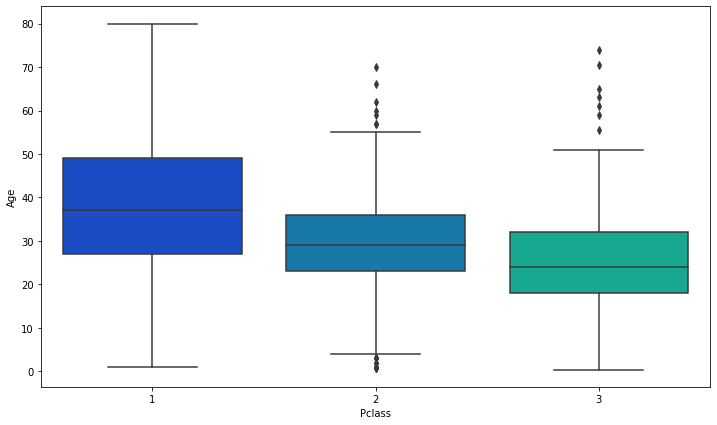

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanicTrain,palette='winter')

In [7]:
def imputation(cols):
  Age, Pclass = cols[0], cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 29
    else:
      return 25
  else:
    return Age

titanicTrain['Age'] = titanicTrain[['Age','Pclass']].apply(imputation,axis=1)

In [8]:
titanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
colsDrop = ['Name','Ticket','Cabin']
titanicTrain.drop(colsDrop,axis=1,inplace=True)
titanicTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [10]:
titanicTrain.dropna(inplace=True)
titanicTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
titanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [12]:
sexTrain = pd.get_dummies(titanicTrain['Sex'],drop_first=True)
sexTrain.head()

,male
0,1
1,0
2,0
3,0
4,1


In [13]:
embarkedTrain = pd.get_dummies(titanicTrain['Embarked'],drop_first=True)
embarkedTrain.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [14]:
titanicTrain.drop(['Sex','Embarked','PassengerId'],axis=1,inplace=True)
titanicTrain = pd.concat([titanicTrain,sexTrain,embarkedTrain],axis=1)
titanicTrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [15]:
titanicTrain.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

Apply standard scaling on xData(attributes/features). Split the dataset to a training set (80% samples) and a testing set (20% samples)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

xData = titanicTrain.drop('Survived',axis=1)
yData = titanicTrain['Survived']

scaler = StandardScaler()
xData = scaler.fit_transform(xData)

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)
print(xTrain.shape, xTest.shape)
print(yTrain.shape, yTest.shape)

(711, 8) (178, 8)
(711,) (178,)


Convert datasets to tensors.

In [17]:
xTrain = torch.tensor(xTrain, dtype=torch.float32)
xTest = torch.tensor(xTest, dtype=torch.float32)
yTrain = torch.tensor(yTrain.values, dtype=torch.float32).view(-1,1)
yTest = torch.tensor(yTest.values, dtype=torch.float32).view(-1,1)

Build the Neural Network for classification and set up the model

In [18]:
from torch.nn import Linear, ReLU, Tanh, Sigmoid, Sequential

numFeats = xData.shape[1]
print('Num of features:', numFeats)
hidden1, hidden2 = 5, 3
NNModel = Sequential(
    Linear(numFeats, hidden1),
    ReLU(),
    Linear(hidden1, hidden2),
    Tanh(),
    Linear(hidden2, 1),
    Sigmoid()
)

Num of features: 8


Set up loss, learning rate, epochs and optimizer before training.

In [19]:
loss = torch.nn.BCELoss()
epochs = 1000
eta = 0.005
optimize = torch.optim.SGD(NNModel.parameters(), lr=eta)

Now we train our Neural Network Model.

In [20]:
lossList = []
for epch in range(1, epochs+1):
  #forward pass
  yPred = NNModel(xTrain)
  epLoss = loss(yPred, yTrain)
  #backward pass
  epLoss.backward()
  #Stochastic Gradient Descent Update
  optimize.step()
  #Empty gradients since backpass adds up gradients
  optimize.zero_grad()
  #View progress
  lossList.append(epLoss.item())
  if epch%10==0:
    print('Epoch', epch, '\t Loss = ', lossList[-1])


Epoch 10 	 Loss =  0.7627930045127869
Epoch 20 	 Loss =  0.7591663599014282
Epoch 30 	 Loss =  0.7556788325309753
Epoch 40 	 Loss =  0.7523244023323059
Epoch 50 	 Loss =  0.7490969300270081
Epoch 60 	 Loss =  0.7459907531738281
Epoch 70 	 Loss =  0.743000328540802
Epoch 80 	 Loss =  0.7401207089424133
Epoch 90 	 Loss =  0.7373469471931458
Epoch 100 	 Loss =  0.7346739172935486
Epoch 110 	 Loss =  0.7320975661277771
Epoch 120 	 Loss =  0.7296132445335388
Epoch 130 	 Loss =  0.7272177338600159
Epoch 140 	 Loss =  0.7249066233634949
Epoch 150 	 Loss =  0.7226763963699341
Epoch 160 	 Loss =  0.720523476600647
Epoch 170 	 Loss =  0.7184441089630127
Epoch 180 	 Loss =  0.7164359092712402
Epoch 190 	 Loss =  0.7144955992698669
Epoch 200 	 Loss =  0.7126202583312988
Epoch 210 	 Loss =  0.7108073234558105
Epoch 220 	 Loss =  0.7090542316436768
Epoch 230 	 Loss =  0.7073583006858826
Epoch 240 	 Loss =  0.7057170271873474
Epoch 250 	 Loss =  0.7041282057762146
Epoch 260 	 Loss =  0.70258992910385

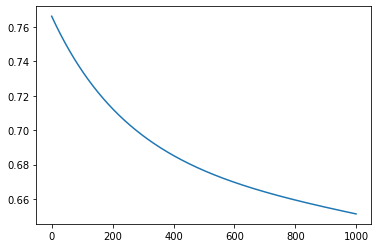

In [21]:
plt.plot(lossList)

Now we find the predicted values for our target in training and test datasets

In [22]:
yTrainPred = NNModel(xTrain).round().detach().numpy()
yTestPred = NNModel(xTest).round().detach().numpy()

In [23]:
from sklearn import metrics

print(metrics.classification_report(yTrain,yTrainPred))
print("Training Accuracy:", metrics.accuracy_score(yTrain,yTrainPred))

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       440
         1.0       1.00      0.03      0.06       271

    accuracy                           0.63       711
   macro avg       0.81      0.52      0.42       711
weighted avg       0.77      0.63      0.50       711

Training Accuracy: 0.6315049226441631


In [24]:
print(metrics.classification_report(yTest,yTestPred))
print("Testing Accuracy:", metrics.accuracy_score(yTest,yTestPred))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       109
         1.0       1.00      0.04      0.08        69

    accuracy                           0.63       178
   macro avg       0.81      0.52      0.43       178
weighted avg       0.77      0.63      0.50       178

Testing Accuracy: 0.6292134831460674
